## Setup

In [2]:
import os
import configparser

import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
#set filepaths
project_root = os.path.abspath(os.getcwd())
root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
config_file =  os.path.join(root, 'config.cfg')

# geodata for shapefiles
config = configparser.ConfigParser()
config.read(config_file)
gdata_root = config['geodata']['path']

## Load data

In [5]:
movement = pd.read_csv("Movements of water rails from Norway.csv", low_memory=False)

In [12]:
movement

,event-id,visible,timestamp,location-long,location-lat,end-timestamp,lat-lower,lat-upper,gls:light-level,long-lower,long-upper,migration-stage,start-timestamp,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,16482465378,True,2014-02-18 17:03:14.000,8.239444,58.177222,2014-03-20 04:50:45.000,58.177222,58.177222,NaN,8.239444,8.239444,stationary,2014-02-18 17:03:14.000,solar-geolocator,Rallus aquaticus,H921,A-2015,Movements of water rails from Norway
1,16482465382,True,2014-03-20 17:58:14.000,10.647650,59.517530,2014-03-20 17:58:14.000,53.655051,64.394473,NaN,5.802474,14.656650,movement,2014-03-20 17:58:14.000,solar-geolocator,Rallus aquaticus,H921,A-2015,Movements of water rails from Norway
2,16482465384,True,2014-03-21 04:36:45.000,13.464800,60.112608,2014-03-21 04:36:45.000,53.804997,64.575714,NaN,9.817736,17.753593,movement,2014-03-21 04:36:45.000,solar-geolocator,Rallus aquaticus,H921,A-2015,Movements of water rails from Norway
3,16482465383,True,2014-03-21 17:59:14.000,13.450941,59.717882,2014-10-14 16:23:14.000,59.710317,59.729257,NaN,13.405008,13.473726,stationary,2014-03-21 17:59:14.000,solar-geolocator,Rallus aquaticus,H921,A-2015,Movements of water rails from Norway
4,16482465380,True,2014-10-15 05:35:45.000,9.447262,59.698134,2014-10-15 05:35:45.000,53.470655,64.591792,NaN,5.794499,15.506162,movement,2014-10-15 05:35:45.000,solar-geolocator,Rallus aquaticus,H921,A-2015,Movements of water rails from Norway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842567,16973286144,True,2015-11-22 23:38:56.000,NaN,NaN,NaN,NaN,NaN,1.136,NaN,NaN,NaN,NaN,solar-geolocator-raw,Rallus aquaticus,H925,F-2015,Movements of water rails from Norway
842568,16973286145,True,2015-11-22 23:43:56.000,NaN,NaN,NaN,NaN,NaN,1.136,NaN,NaN,NaN,NaN,solar-geolocator-raw,Rallus aquaticus,H925,F-2015,Movements of water rails from Norway
842569,16973286146,True,2015-11-22 23:48:56.000,NaN,NaN,NaN,NaN,NaN,1.136,NaN,NaN,NaN,NaN,solar-geolocator-raw,Rallus aquaticus,H925,F-2015,Movements of water rails from Norway
842570,16973286147,True,2015-11-22 23:53:56.000,NaN,NaN,NaN,NaN,NaN,1.136,NaN,NaN,NaN,NaN,solar-geolocator-raw,Rallus aquaticus,H925,F-2015,Movements of water rails from Norway


In [ ]:
# Load map of UK
world = gpd.GeoDataFrame.from_file(os.path.join(gdata_root, 'natural-earth\\ne_50m_admin_0_countries\\ne_50m_admin_0_countries.shp'))
uk = world[world['ADM0_A3']=='GBR'].to_crs('27700')

In [7]:
# load world countries shapefile
file = "ne_10m_admin_0_countries"
countries = gpd.GeoDataFrame.from_file(os.path.join(gdata_root, "natural-earth\\%s\\%s.shp" %(file, file)))

countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,0,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,1,Bolivia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,1,Peru,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [34]:
data = movement
x = data["location-long"]
y = data["location-lat"]

In [161]:
data

,event-id,visible,timestamp,location-long,location-lat,end-timestamp,lat-lower,lat-upper,gls:light-level,long-lower,long-upper,migration-stage,start-timestamp,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
48,16482475483,True,2015-02-05 16:41:14.000,8.239444,58.177222,2015-03-29 18:34:14.000,58.177222,58.177222,NaN,8.239444,8.239444,stationary,2015-02-05 16:41:14.000,solar-geolocator,Rallus aquaticus,P845,H-2015,Movements of water rails from Norway
49,16482475485,True,2015-03-30 04:31:45.000,8.564333,57.632121,2015-03-30 04:31:45.000,52.894208,62.690957,NaN,4.786718,13.343967,movement,2015-03-30 04:31:45.000,solar-geolocator,Rallus aquaticus,P845,H-2015,Movements of water rails from Norway
50,16482475491,True,2015-03-30 17:46:14.000,19.059420,57.271921,2015-03-30 17:46:14.000,52.102632,62.541072,NaN,13.409895,23.203148,movement,2015-03-30 17:46:14.000,solar-geolocator,Rallus aquaticus,P845,H-2015,Movements of water rails from Norway
51,16482475489,True,2015-03-31 03:46:45.000,16.387643,57.916948,2015-06-11 01:03:45.000,57.900048,57.953185,NaN,16.372234,16.391666,stationary,2015-03-31 03:46:45.000,solar-geolocator,Rallus aquaticus,P845,H-2015,Movements of water rails from Norway
52,16482475493,True,2015-06-11 19:58:14.000,23.853859,55.699040,2015-06-11 19:58:14.000,53.791608,57.390665,NaN,18.555576,29.113223,movement,2015-06-11 19:58:14.000,solar-geolocator,Rallus aquaticus,P845,H-2015,Movements of water rails from Norway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547655,16973698456,True,2015-11-22 23:35:04.000,NaN,NaN,NaN,NaN,NaN,1.136,NaN,NaN,NaN,NaN,solar-geolocator-raw,Rallus aquaticus,P845,H-2015,Movements of water rails from Norway
547656,16973698457,True,2015-11-22 23:40:04.000,NaN,NaN,NaN,NaN,NaN,1.136,NaN,NaN,NaN,NaN,solar-geolocator-raw,Rallus aquaticus,P845,H-2015,Movements of water rails from Norway
547657,16973698458,True,2015-11-22 23:45:04.000,NaN,NaN,NaN,NaN,NaN,1.136,NaN,NaN,NaN,NaN,solar-geolocator-raw,Rallus aquaticus,P845,H-2015,Movements of water rails from Norway
547658,16973698459,True,2015-11-22 23:50:04.000,NaN,NaN,NaN,NaN,NaN,1.136,NaN,NaN,NaN,NaN,solar-geolocator-raw,Rallus aquaticus,P845,H-2015,Movements of water rails from Norway


In [142]:
def hanging_line(point1, point2):
    import numpy as np

    a = (point2[1] - point1[1])/(np.cosh(point2[0]) - np.cosh(point1[0]))
    b = point1[1] - a*np.cosh(point1[0])
    x = np.linspace(point1[0], point2[0], 100)
    y = a*np.cosh(x) + b

    return (x,y)

(-13.0, 51.0)

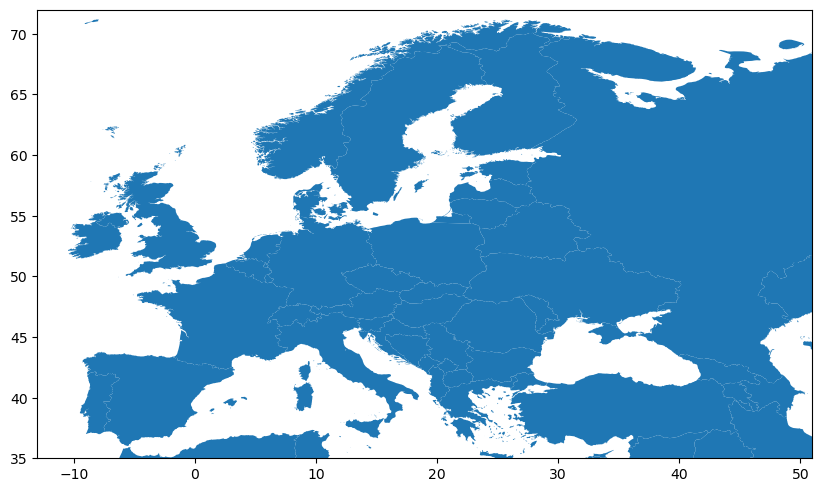

In [167]:
fig, ax = plt.subplots(figsize=(10,10))
countries.plot(ax=ax )

point1 = [8.239444, 58.177222]
point2 = [8.564333, 57.632121]

point1 = [57.900048, 57.953185]
point2 = [53.791608, 57.390665]

x,y = hanging_line(point1, point2)
plt.plot(x,y, color="red")

#ax.plot(x, y, color="red")
ax.set_ylim(ymin=35, ymax=72)
ax.set_xlim(xmin=-13, xmax=51)

C:\Users\lisa.hornung\AppData\Local\Temp\ipykernel_27472\3736657545.py:26: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  arc = patches.Arc(mxmy, width, height, start_angle, end_angle)


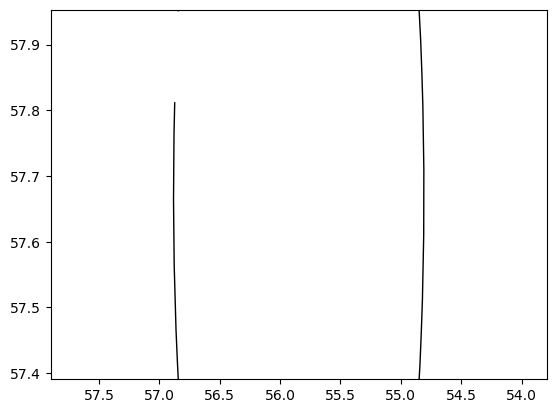

In [166]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import patches

# set the points
x1, y1 = (0., 0.)
x2, y2 = (10., 0.)

x1, y1 = (8.239444, 58.177222)
x2, y2 = (8.564333, 57.632121)

x1, y1 = (57.900048, 57.953185)
x2, y2 =(53.791608, 57.390665)


# calculate the arc
mxmy = mx, my = [(x1 + x2) / 2, (y1 + y2) / 2]
r = np.sqrt((x1 - mx)**2 + (y1 - my)**2)
width = 1 * r
height = 1 * r
start_angle = np.arctan2(y1 - my, x1 - mx) * 180 / np.pi
end_angle = np.arctan2(my - y2, mx - x2) * 180 / np.pi

# draw
arc = patches.Arc(mxmy, width, height, start_angle, end_angle)

fig, ax = plt.subplots(1,1)
ax.add_patch(arc)
ax.set_xlim(x1, x2) # you need to set the appropriate limits explicitly!
ax.set_ylim(y2, y1)
plt.show()

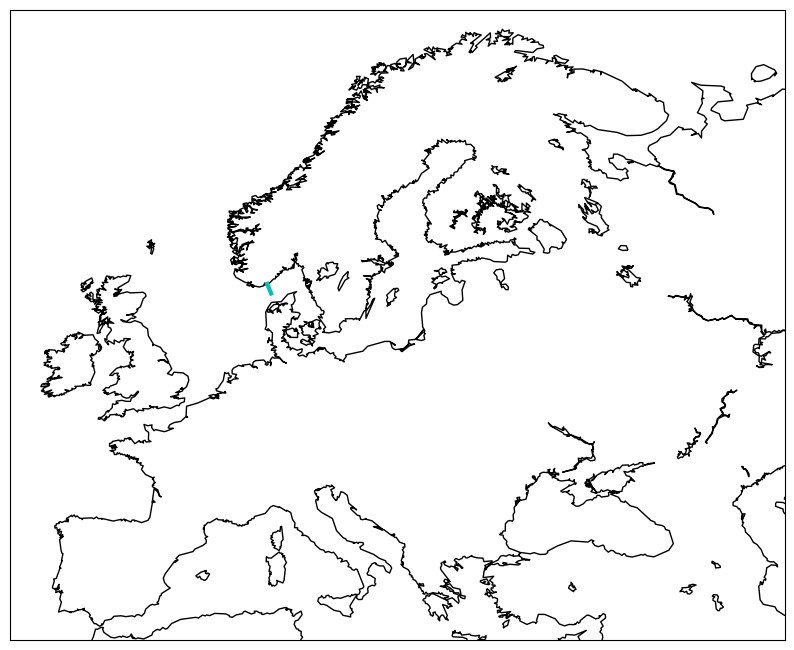

In [82]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

m = Basemap(projection='mill',
            llcrnrlat = 35,
            llcrnrlon = -13,
            urcrnrlat = 72,
            urcrnrlon =51,
            resolution='l',
            ax=ax)

m.drawcoastlines()

m.drawgreatcircle(8.239444, 58.177222, 8.564333, 57.632121, del_s=100, color='c', linewidth=3, label='Arc')

plt.show()

In [40]:
data = movement[movement["tag-local-identifier"]=="P845"]
x = data["location-long"]
y = data["location-lat"]

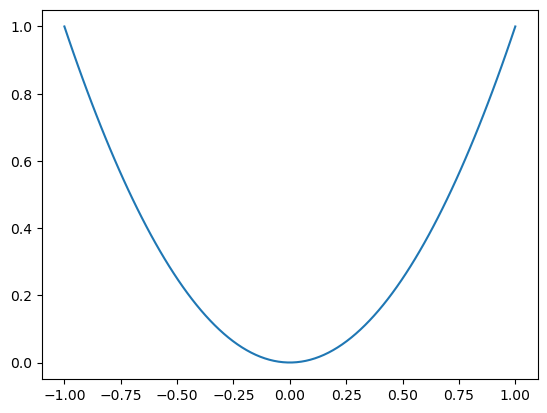

In [92]:
fig, ax = plt.subplots()


x = np.linspace(-1, 1, 100)
y = x*x

ax.plot(x,y)

plt.show()

In [93]:
def recta(x1, y1, x2, y2):
    a = (y1 - y2) / (x1 - x2)
    b = y1 - a * x1
    return (a, b)

def curva_b(xa, ya, xb, yb, xc, yc):
    (x1, y1, x2, y2) = (xa, ya, xb, yb)
    (a1, b1) = recta(xa, ya, xb, yb)
    (a2, b2) = recta(xb, yb, xc, yc)
    puntos = []

    for i in range(0, 1000):
        if x1 == x2:
            continue
        else:
            (a, b) = recta(x1, y1, x2, y2)
        x = i*(x2 - x1)/1000 + x1
        y = a*x + b
        puntos.append((x,y))
        x1 += (xb - xa)/1000
        y1 = a1*x1 + b1
        x2 += (xc - xb)/1000
        y2 = a2*x2 + b2
    return puntos

In [100]:


lista1 = curva_b(8.239444, 58.177222, 8.564333, 57.632121)

fig, ax = plt.subplots()
ax.scatter(*zip(*lista1), s=1, c='b')

TypeError: curva_b() missing 2 required positional arguments: 'xc' and 'yc'